In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
import numpy as np
import os, cv2, random, glob
import matplotlib.image as mpimg
from keras.models import load_model
from keras.callbacks import ModelCheckpoint, CSVLogger 
%matplotlib inline 

C:\Users\Rodrigo Valentim\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Treinamento teste para uma pequena quantidade de imagens

In [2]:
img_width, img_height = 150, 150
train_data_dir = 'data/train'
nb_train_samples = 2000
epochs = 50
batch_size = 16
def deep():

    if K.image_data_format() == 'channels_first':
        input_shape = (3, img_width, img_height)
    else:
        input_shape = (img_width, img_height, 3)  
  
    model = Sequential()
    model.add(Conv2D(32,(3, 3), input_shape=input_shape))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    

    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(64))
    model.add(Activation('relu'))

    model.add(Dropout(0.5))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    return model

In [3]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
        
    )
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 2000 images belonging to 2 classes.


In [ ]:
model = deep()
epoch_num = 2 
outputFolder = ''
file_ini = outputFolder+'weights-improvement-01-0.53.hdf5'
filename =  glob.glob(file_ini)

model.load_weights(file_ini)
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
outputFolder = ''

callbacks = ModelCheckpoint("weights-improvement-{epoch:02d}-{acc:.2f}.hdf5", monitor='acc', verbose=0, save_best_only=False,
                                save_weights_only=False, mode='auto', period=1)
callbacks_list = [callbacks]

history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=45,
    callbacks = callbacks_list, initial_epoch = epoch_num);

# Métricas Acurácia e Log loss para rede de teste

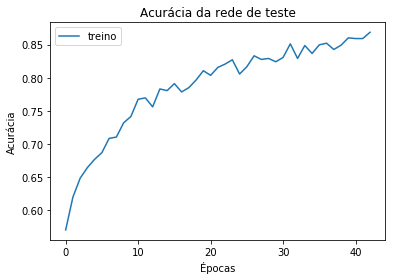

In [22]:
plt.plot(history.history['acc'])
plt.title('Acurácia da rede de teste')
plt.ylabel('Acurácia')
plt.xlabel('Épocas')
plt.legend(['treino'], loc='upper left')
plt.show()

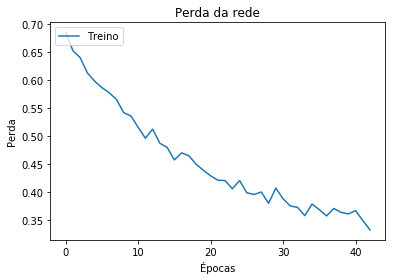

In [24]:
plt.plot(history.history['loss'])
plt.title('Perda da rede')
plt.ylabel('Perda')
plt.xlabel('Épocas')
plt.legend(['Treino'], loc='upper left')
plt.show()